<a href="https://colab.research.google.com/github/Faouzi-Slimi/python_Avancee/blob/main/TP_Prediction_Words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepare Data

In [33]:

## Import Libray

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.preprocessing.text import Tokenizer
import time
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from numpy import array
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras import layers
from keras.layers import Embedding
from tensorflow.keras.layers import LSTM,Bidirectional,GRU
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [133]:
## Import Data

string = """Artificial Intelligence (AI) is a technical science that studies and develops theories, methods, technologies, and applications for simulating and extending human intelligence. The purpose of AI is to enable machines to think like people and to make machines intelligent. Today, AI has become an interdisciplinary course that involves various fields."""

## Split and Preprocess Data

max_words = 1000
max_len=150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts([string])
sequences = tok.texts_to_sequences([string])[0]
words_size = len(tok.index_word)+1

words_size


40

In [12]:
# Check Data
sequences

[8,
 4,
 2,
 5,
 9,
 10,
 11,
 6,
 12,
 1,
 13,
 14,
 15,
 16,
 1,
 17,
 18,
 19,
 1,
 20,
 21,
 4,
 22,
 23,
 24,
 2,
 5,
 3,
 25,
 7,
 3,
 26,
 27,
 28,
 1,
 3,
 29,
 7,
 30,
 31,
 2,
 32,
 33,
 34,
 35,
 36,
 6,
 37,
 38,
 39]

In [233]:
# Check Data
tok.index_word.items()

dict_items([(1, 'and'), (2, 'ai'), (3, 'to'), (4, 'intelligence'), (5, 'is'), (6, 'that'), (7, 'machines'), (8, 'artificial'), (9, 'a'), (10, 'technical'), (11, 'science'), (12, 'studies'), (13, 'develops'), (14, 'theories'), (15, 'methods'), (16, 'technologies'), (17, 'applications'), (18, 'for'), (19, 'simulating'), (20, 'extending'), (21, 'human'), (22, 'the'), (23, 'purpose'), (24, 'of'), (25, 'enable'), (26, 'think'), (27, 'like'), (28, 'people'), (29, 'make'), (30, 'intelligent'), (31, 'today'), (32, 'has'), (33, 'become'), (34, 'an'), (35, 'interdisciplinary'), (36, 'course'), (37, 'involves'), (38, 'various'), (39, 'fields')])

In [79]:
## Extract Features And Labels

x = np.array(sequences[:len(sequences)-1])
y = np.array(sequences[1:])

x = np.array(x)
y = np.array(y)


x.shape,y.shape


((49,), (49,))

In [80]:

y = to_categorical(y, num_classes=words_size)

## LSTM Model

In [299]:

# Set the random Seed

tf.random.set_seed(42)

# Create LSTM_Model

lstm_model = Sequential()
lstm_model.add(Embedding(words_size,40, input_length=1))

lstm_model.add(LSTM(100,dropout=0.1))

lstm_model.add(Dense(words_size, activation="softmax"))


In [300]:
# Compile the model
lstm_model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy',])

# Fit the Model
lstm_History = lstm_model.fit(x,y,epochs= 149)

Epoch 1/149
2/2 [==============================] - 1s 10ms/step - loss: 3.6902 - accuracy: 0.0204
Epoch 2/149
2/2 [==============================] - 0s 7ms/step - loss: 3.6878 - accuracy: 0.0408
Epoch 3/149
2/2 [==============================] - 0s 7ms/step - loss: 3.6857 - accuracy: 0.0816
Epoch 4/149
2/2 [==============================] - 0s 7ms/step - loss: 3.6832 - accuracy: 0.1837
Epoch 5/149
2/2 [==============================] - 0s 8ms/step - loss: 3.6813 - accuracy: 0.1224
Epoch 6/149
2/2 [==============================] - 0s 8ms/step - loss: 3.6786 - accuracy: 0.1837
Epoch 7/149
2/2 [==============================] - 0s 7ms/step - loss: 3.6766 - accuracy: 0.2245
Epoch 8/149
2/2 [==============================] - 0s 7ms/step - loss: 3.6742 - accuracy: 0.2041
Epoch 9/149
2/2 [==============================] - 0s 7ms/step - loss: 3.6718 - accuracy: 0.2245
Epoch 10/149
2/2 [==============================] - 0s 7ms/step - loss: 3.6692 - accuracy: 0.2041
Epoch 11/149
2/2 [==========

In [265]:
lstm_model.summary()


Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_74 (Embedding)    (None, 1, 40)             1600      
                                                                 
 lstm_124 (LSTM)             (None, 100)               56400     
                                                                 
 dense_126 (Dense)           (None, 40)                4040      
                                                                 
Total params: 62,040
Trainable params: 62,040
Non-trainable params: 0
_________________________________________________________________


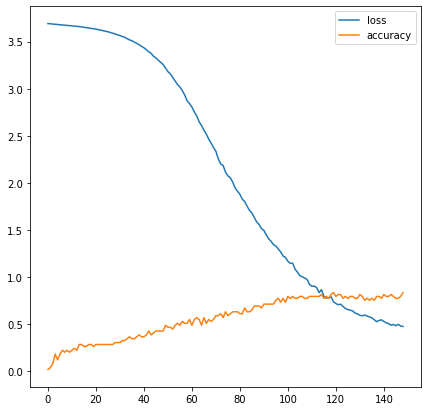

In [301]:
# Plots

pd.DataFrame(lstm_History.history).plot(figsize=(7,7))
plt.show()

In [302]:
# Prediction Function

def Next_Word(model ):
  
  
  try :
    word=input()
    wrd = tok.texts_to_sequences([word])[0]
    pred=model.predict(wrd)
    pred=np.argmax(pred)
    for key, values in tok.word_index.items():
        if  values == pred:
            nextword=key
            print(nextword)
  except :
    print(" Soryy, Our Model can't predict this word...." ) 
  
Next_Word(lstm_model)


that
involves


In [268]:
Next_Word(lstm_model)

english
 Soryy, Our Model can't predict this word....


## BLSTM Model

In [315]:
# Set the Random Seed

tf.random.set_seed(42)

# Create Blstm_Model

Blstm_model = Sequential()
Blstm_model.add(Embedding(words_size,40, input_length=1))
Blstm_model.add(Bidirectional(LSTM(100, dropout=0.1)))
Blstm_model.add(Dense(words_size, activation="softmax"))


In [316]:
# Compile the model
Blstm_model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy',])

# Fit the Model
Blstm_History = Blstm_model.fit(x,y,epochs= 231)

Epoch 1/231
2/2 [==============================] - 3s 11ms/step - loss: 3.6894 - accuracy: 0.0000e+00
Epoch 2/231
2/2 [==============================] - 0s 10ms/step - loss: 3.6863 - accuracy: 0.1020
Epoch 3/231
2/2 [==============================] - 0s 9ms/step - loss: 3.6826 - accuracy: 0.1633
Epoch 4/231
2/2 [==============================] - 0s 9ms/step - loss: 3.6797 - accuracy: 0.1633
Epoch 5/231
2/2 [==============================] - 0s 9ms/step - loss: 3.6765 - accuracy: 0.2041
Epoch 6/231
2/2 [==============================] - 0s 8ms/step - loss: 3.6735 - accuracy: 0.1837
Epoch 7/231
2/2 [==============================] - 0s 8ms/step - loss: 3.6707 - accuracy: 0.1837
Epoch 8/231
2/2 [==============================] - 0s 9ms/step - loss: 3.6666 - accuracy: 0.1837
Epoch 9/231
2/2 [==============================] - 0s 9ms/step - loss: 3.6630 - accuracy: 0.2041
Epoch 10/231
2/2 [==============================] - 0s 8ms/step - loss: 3.6591 - accuracy: 0.2041
Epoch 11/231
2/2 [=====

In [317]:
Blstm_model.summary()

Model: "sequential_89"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_87 (Embedding)    (None, 1, 40)             1600      
                                                                 
 bidirectional_11 (Bidirecti  (None, 200)              112800    
 onal)                                                           
                                                                 
 dense_140 (Dense)           (None, 40)                8040      
                                                                 
Total params: 122,440
Trainable params: 122,440
Non-trainable params: 0
_________________________________________________________________


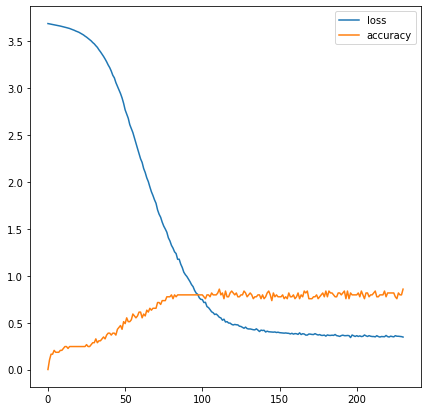

In [318]:
# Plots

pd.DataFrame(Blstm_History.history).plot(figsize=(7,7))
plt.show()

In [319]:
## Prediction Of Word

Next_Word(Blstm_model)

that
involves


In [320]:
Next_Word(lstm_model)

that
involves


## GRU Model

In [329]:
# Set The Random Seed

tf.random.set_seed(42)

# Create Model

# Set the Random Seed

tf.random.set_seed(42)

# Create Blstm_Model

Gru_Model = Sequential()
Gru_Model.add(Embedding(words_size,40, input_length=1))
Gru_Model.add(GRU(100, dropout=0.1))
Gru_Model.add(Dense(words_size, activation="softmax"))


In [330]:
# Compile the model
Gru_Model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy',])

# Fit the Model
Gru_History = Gru_Model.fit(x,y,epochs= 167)

Epoch 1/167
2/2 [==============================] - 1s 10ms/step - loss: 3.6895 - accuracy: 0.0000e+00
Epoch 2/167
2/2 [==============================] - 0s 7ms/step - loss: 3.6833 - accuracy: 0.0612
Epoch 3/167
2/2 [==============================] - 0s 7ms/step - loss: 3.6787 - accuracy: 0.1020
Epoch 4/167
2/2 [==============================] - 0s 7ms/step - loss: 3.6739 - accuracy: 0.1837
Epoch 5/167
2/2 [==============================] - 0s 7ms/step - loss: 3.6692 - accuracy: 0.1837
Epoch 6/167
2/2 [==============================] - 0s 7ms/step - loss: 3.6644 - accuracy: 0.2449
Epoch 7/167
2/2 [==============================] - 0s 11ms/step - loss: 3.6594 - accuracy: 0.2449
Epoch 8/167
2/2 [==============================] - 0s 7ms/step - loss: 3.6538 - accuracy: 0.2041
Epoch 9/167
2/2 [==============================] - 0s 8ms/step - loss: 3.6500 - accuracy: 0.1633
Epoch 10/167
2/2 [==============================] - 0s 7ms/step - loss: 3.6441 - accuracy: 0.2041
Epoch 11/167
2/2 [=====

In [331]:
Gru_Model.summary()

Model: "sequential_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_93 (Embedding)    (None, 1, 40)             1600      
                                                                 
 gru_4 (GRU)                 (None, 100)               42600     
                                                                 
 dense_145 (Dense)           (None, 40)                4040      
                                                                 
Total params: 48,240
Trainable params: 48,240
Non-trainable params: 0
_________________________________________________________________


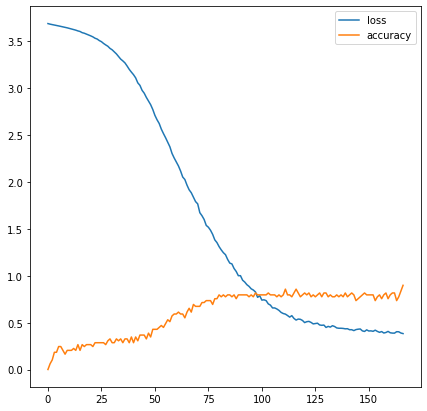

In [333]:
# Plots

pd.DataFrame(Gru_History.history).plot(figsize=(7,7))
plt.show()

In [339]:
# Predict Word
Next_Word(Gru_Model)

that
involves


In [351]:
# Predict for model LSTM
for key, values in tok.word_index.items():
    word = key
    wrd = tok.texts_to_sequences([word])[0]
    pred=lstm_model.predict(wrd)
    pred=np.argmax(pred)
    for key, values in tok.word_index.items():
        if  values == pred:
            nextword=key
            print(word , " =======> ",nextword)
            
        

and  =======>  extending
ai  =======>  is
to  =======>  make
intelligence  =======>  ai
is  =======>  a
that  =======>  involves
machines  =======>  intelligent
artificial  =======>  intelligence
a  =======>  technical
technical  =======>  science
science  =======>  that
studies  =======>  and
develops  =======>  theories
theories  =======>  methods
methods  =======>  technologies
technologies  =======>  and
applications  =======>  for
for  =======>  simulating
simulating  =======>  and
extending  =======>  human
human  =======>  intelligence
the  =======>  purpose
purpose  =======>  of
of  =======>  ai
enable  =======>  machines
think  =======>  like
like  =======>  people
people  =======>  and
make  =======>  machines
intelligent  =======>  today
today  =======>  ai
has  =======>  become
become  =======>  an
an  =======>  interdisciplinary
interdisciplinary  =======>  course
course  =======>  that
involves  =======>  various
various  =======>  fields
fields  =======>  machines


In [352]:
# Prediction For BLSTM

for key, values in tok.word_index.items():
    word = key
    wrd = tok.texts_to_sequences([word])[0]
    pred=Blstm_model.predict(wrd)
    pred=np.argmax(pred)
    for key, values in tok.word_index.items():
        if  values == pred:
            nextword=key
            print(word , " =======> ",nextword)
            
        

and  =======>  the
ai  =======>  ai
to  =======>  extending
intelligence  =======>  applications
is  =======>  like
that  =======>  technologies
machines  =======>  like
artificial  =======>  is
a  =======>  human
technical  =======>  artificial
science  =======>  extending
studies  =======>  simulating
develops  =======>  machines
theories  =======>  think
methods  =======>  to
technologies  =======>  ai
applications  =======>  machines
for  =======>  artificial
simulating  =======>  methods
extending  =======>  make
human  =======>  is
the  =======>  make
purpose  =======>  make
of  =======>  fields
enable  =======>  enable
think  =======>  make
like  =======>  an
people  =======>  is
make  =======>  to
intelligent  =======>  is
today  =======>  extending
has  =======>  ai
become  =======>  is
an  =======>  that
interdisciplinary  =======>  of
course  =======>  theories
involves  =======>  studies
various  =======>  intelligent
fields  =======>  to


In [353]:
# Prediction For GRU

for key, values in tok.word_index.items():
    word = key
    wrd = tok.texts_to_sequences([word])[0]
    pred=Gru_Model.predict(wrd)
    pred=np.argmax(pred)
    for key, values in tok.word_index.items():
        if  values == pred:
            nextword=key
            print(word , " =======> ",nextword)
            
        

and  =======>  extending
ai  =======>  is
to  =======>  enable
intelligence  =======>  ai
is  =======>  to
that  =======>  involves
machines  =======>  to
artificial  =======>  intelligence
a  =======>  technical
technical  =======>  science
science  =======>  that
studies  =======>  and
develops  =======>  theories
theories  =======>  methods
methods  =======>  technologies
technologies  =======>  and
applications  =======>  for
for  =======>  simulating
simulating  =======>  and
extending  =======>  human
human  =======>  intelligence
the  =======>  purpose
purpose  =======>  of
of  =======>  ai
enable  =======>  machines
think  =======>  like
like  =======>  people
people  =======>  and
make  =======>  machines
intelligent  =======>  today
today  =======>  ai
has  =======>  become
become  =======>  an
an  =======>  interdisciplinary
interdisciplinary  =======>  course
course  =======>  that
involves  =======>  various
various  =======>  fields
fields  =======>  to
